# <span id="toc">  Esercizio 5 - Algoritmo di Metropolis </span>

- [Esercizio 5.1](#ex05_1)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In meccanica quantistica una funzione d’onda $\Psi$ rappresenta un’ampiezza di probabilità, che descrive matematicamente lo stato di un sistema e da cui è possibile dedurre i valori di aspettazione delle osservabili del sistema.


In questo esercizio considero il caso di una particella non relativistica, senza spin, in tre dimensioni spaziali e il cui stato può essere completamente descritto dalla sua funzione d’onda, $\Psi(\vec{r},t)$, dove $\vec{r}$ è la posizione e $t$ il tempo.

Il modulo quadro della funzione d’onda $|\Psi(\vec{r},t)|^2$, è la densità di probabilità che la particella si trovi in $\vec{r}$ al tempo $t$.  

Le funzioni d’onda degli autostati di un elettrone in un atomo di idrogeno sono espresse in termini di armoniche sferiche e polinomi di Laguerre generalizzati:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

dove $a_0 = \frac{4\pi\epsilon_0 \hbar^2}{m_e e^2} = 0.0529\,\text{nm}$ è il raggio di Bohr, $n=1,2,\dots$ è il numero quantico principale, $l=0,1,\dots,n-1$ è il numero quantico azimutale, $m=-l,-l+1,\dots,l$ è il numero quantico magnetico.

In particolare per questo esercizio considero il **Ground State (GS)** e il primo **Stato Eccitato (ES)**, con rispettive funzioni d'onda:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}
\qquad \qquad
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

I rispettivi valori attesi del raggio risultano essere esattamente:

$$
\langle r \rangle_{1,0,0} = \tfrac{3}{2} a_0, \qquad
\langle r \rangle_{2,1,0} = 5a_0
$$


## <span id="ex05_1">  Esercizio 5.1 </span>[^](#toc)

Utilizzo l’**algoritmo di Metropolis** per campionare $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$ 
in coordinate cartesiane (unità di lunghezza in $a_0$), utilizzano poi le posizioni campionate per stimare le distanze medie dal centro del nucleo $\langle r \rangle_{1,0,0}$ e $\langle r \rangle_{2,1,0}$, confrontando i valori ottenuti con le previsioni teoriche per entrambi gli stati.

L'algoritmo utilizzato funziona in questo modo: parte da una posizione attuale $y$, propone un passo casuale nello spazio 3D di ampiezza massima $L$ che porta a una nuova posizione $x$ e accetta la mossa proposta con probabilità $
A(x|y) = \min \left[1, \frac{p(x)}{p(y)}\right]$ dove $p$ è la densità di probabilità per un certo stato. Tutte le mosse verso regioni più probabili vengono accettate al $100\%$, mentre una parte delle mosse verso regioni meno probabili viene rifiutata.

La proposta di passo casuale è stata implementata utilizzando due diverse probabilità di transizione $T(x|y)$:
- **Uniforme**, tra $[-L, L]$ 
- **Gaussiana**, con deviazione standard $\sigma = L$

dove $L$ è scelto in modo da ottenere circa il $50\%$ di accettazione in entrambi i casi.

### Fase di equilibrazione

Prima di tutto è necessario equilibrare il sistema, per evitare che la particella si trovi inizialmente in posizioni "improbabili" che ne alterano la stima della distanza media dal centro. Così facendo, quando eseguirò la simulazione vera e propria sarà possibile ripartire dalle posizioni finali ottenute durante l'equilibrazione, grazie all'opzione `restart` che ho implementato nel mio codice.

Per farlo ho impostato i seguenti parametri iniziali per ognuna delle configurazioni studiate:
```
500  blocchi
1    step per blocco
1.5  passo unif/gauss
30   pos iniz asse x 
```

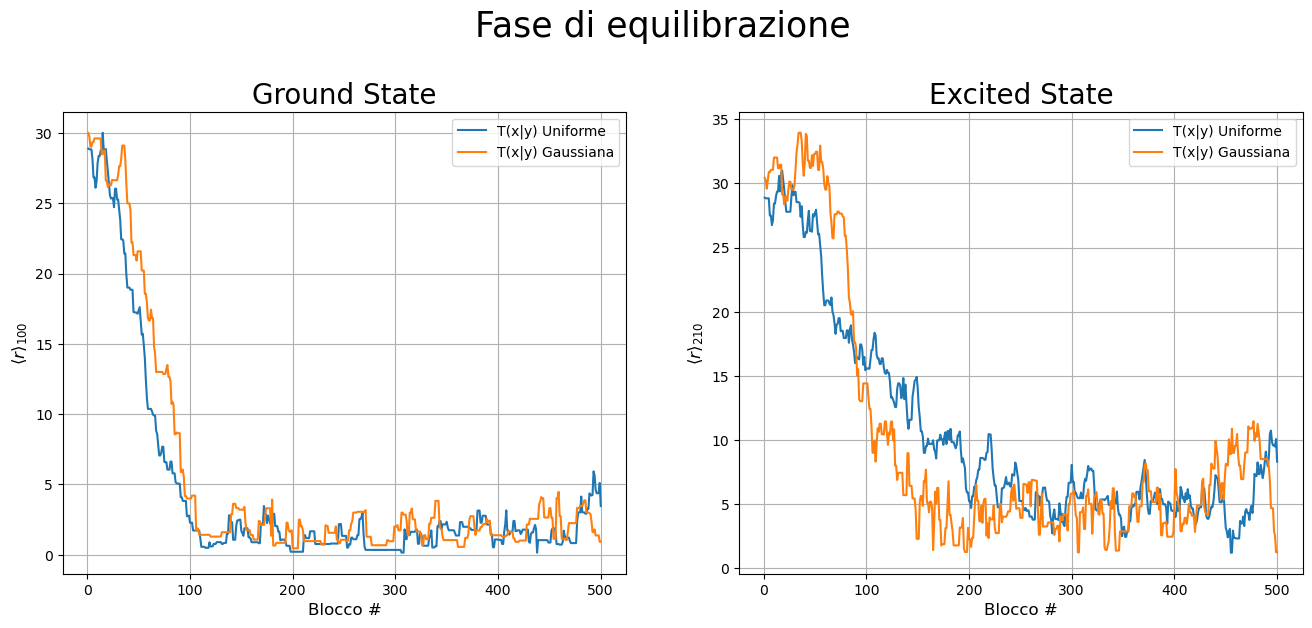

In [2]:
# Fase di equilibrazione
plt.figure(figsize=(16,6))
plt.suptitle('Fase di equilibrazione', fontsize=25, y=1.05)

# GS
plt.subplot(1,2,1)
block, d_gs_unif = np.loadtxt('OUTPUT/equilibration/gs_unif/radius.dat', skiprows=1, usecols=(0,1), unpack=True)
block, d_gs_gauss = np.loadtxt('OUTPUT/equilibration/gs_gauss/radius.dat', skiprows=1, usecols=(0,1), unpack=True)
plt.plot(block, d_gs_unif, label='T(x|y) Uniforme')
plt.plot(block, d_gs_gauss, label='T(x|y) Gaussiana')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel(r'$\langle r \rangle_{100}$', fontsize=12)
plt.title('Ground State', fontsize=20)
plt.grid(True)
plt.legend()

# ES
plt.subplot(1,2,2)
block, d_es_unif = np.loadtxt('OUTPUT/equilibration/es_unif/radius.dat', skiprows=1, usecols=(0,1), unpack=True)
block, d_es_gauss = np.loadtxt('OUTPUT/equilibration/es_gauss/radius.dat', skiprows=1, usecols=(0,1), unpack=True)
plt.plot(block, d_es_unif, label='T(x|y) Uniforme')
plt.plot(block, d_es_gauss, label='T(x|y) Gaussiana')
plt.xlabel('Blocco #', fontsize=12)
plt.ylabel(r'$\langle r \rangle_{210}$', fontsize=12)
plt.title('Excited State', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

Dai grafici si può osservare che il sistema si porta all'equilibrio sempre in meno di 500 passi.

Questo significa inoltre che entro questo numero di passi la correlazione tra le posizioni campionate rispetto a quella iniziale scompare, quindi è sufficiente considerare blocchi lunghi almeno $500$ passi (preferibilmente di più) per il calcolo delle medie progressive.

Di seguito riporto la distribuzione nello spazio 3D dei punti campionati durante l'evoluzione del sistema, partendo da una posizione lontana dall'origine. Si può osservare che al termine della fase di equilibrazione le particelle si distribuiscono seguendo la distribuzione di probabilità corretta, "dimenticandosi" delle condizioni iniziali. 

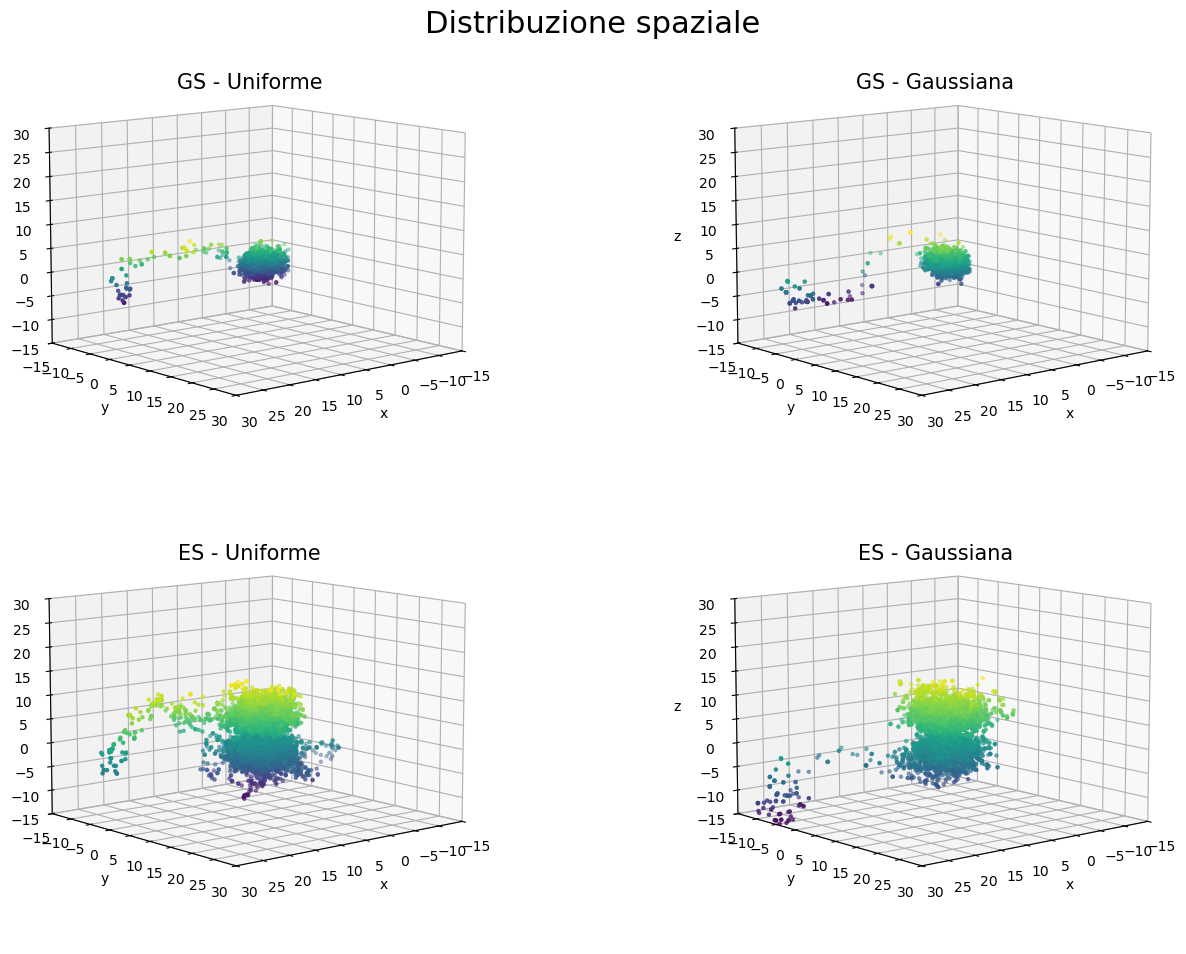

In [3]:
# Distribuzione spaziale
fig = plt.figure(figsize=(16,10))
plt.suptitle('Distribuzione spaziale', fontsize=22, y=0.95)

# GS - Uniforme
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
x, y, z = np.loadtxt('OUTPUT/3D_position/gs_unif/position.dat', skiprows=1, usecols=(0,1,2), unpack=True)
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_title('GS - Uniforme', fontsize=15, y=0.9)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_xlim(-15, 30)
ax1.set_ylim(-15, 30)
ax1.set_zlim(-15, 30)
ax1.view_init(10, 50)

# GS - Gaussiana
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
x, y, z = np.loadtxt('OUTPUT/3D_position/gs_gauss/position.dat', skiprows=1, usecols=(0,1,2), unpack=True)
ax2.scatter(x, y, z, c=z, marker='.')
ax2.set_title('GS - Gaussiana', fontsize=15, y=0.9)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_xlim(-15, 30)
ax2.set_ylim(-15, 30)
ax2.set_zlim(-15, 30)
ax2.view_init(10, 50)

# ES - Uniforme
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
x, y, z = np.loadtxt('OUTPUT/3D_position/es_unif/position.dat', skiprows=1, usecols=(0,1,2), unpack=True)
ax3.scatter(x, y, z, c=z, marker='.')
ax3.set_title('ES - Uniforme', fontsize=15, y=0.9)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_xlim(-15, 30)
ax3.set_ylim(-15, 30)
ax3.set_zlim(-15, 30)
ax3.view_init(10, 50)

# ES - Gaussiana
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
x, y, z = np.loadtxt('OUTPUT/3D_position/es_gauss/position.dat', skiprows=1, usecols=(0,1,2), unpack=True)
ax4.scatter(x, y, z, c=z, marker='.')
ax4.set_title('ES - Gaussiana', fontsize=15, y=0.9)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.set_xlim(-15, 30)
ax4.set_ylim(-15, 30)
ax4.set_zlim(-15, 30)
ax4.view_init(10, 50)

plt.tight_layout()
plt.show()

### Ground state

Per queste simulazioni ho utilizzato i seguenti parametri:
```
100      blocchi
10000    step per blocco
1.9/3.0  passo unif/gauss
```
I valori del passo $L$ sono stati scelti in modo da avere un'accettazione rispettivamente del $0.497148$ e del $0.497569$. 
Per entrambe le configurazioni, le posizioni di partenza sono pari a quelle finali ottenute durante la fase di equilibrazione. 

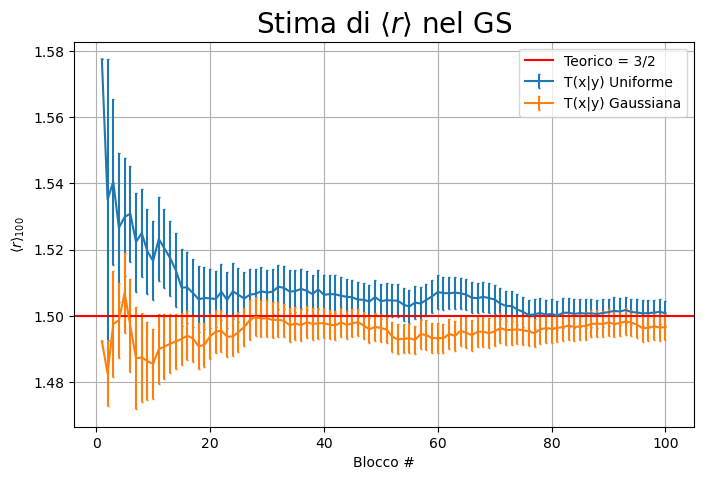

Valore medio finale di <r> nel GS con p. uniforme =  1.5008
Incertezza =  0.00383314

Valore medio finale di <r> nel GS con p. gaussiana =  1.49661
Incertezza =  0.00392324


In [4]:
# Ground state
plt.figure(figsize=(8,5))

block, r_gs_unif, err_gs_unif = np.loadtxt('OUTPUT/radius/gs_unif/radius.dat', skiprows=1, usecols=(0,2,3), unpack=True)
block, r_gs_gauss, err_gs_gauss = np.loadtxt('OUTPUT/radius/gs_gauss/radius.dat', skiprows=1, usecols=(0,2,3), unpack=True)

plt.errorbar(block, r_gs_unif, yerr=err_gs_unif, capsize=1, label='T(x|y) Uniforme')
plt.errorbar(block, r_gs_gauss, yerr=err_gs_gauss, capsize=1, label='T(x|y) Gaussiana')
plt.axhline(y=3/2, color='r', linestyle='-', label='Teorico = 3/2')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel(r'$\langle r \rangle_{100}$', fontsize=10)
plt.title(r'Stima di $\langle r \rangle$ nel GS', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

print('Valore medio finale di <r> nel GS con p. uniforme = ', r_gs_unif[-1])
print('Incertezza = ', err_gs_unif[-1])
print()
print('Valore medio finale di <r> nel GS con p. gaussiana = ', r_gs_gauss[-1])
print('Incertezza = ', err_gs_gauss[-1])

### Excited state

Per queste simulazioni ho utilizzato i seguenti parametri:
```
100      blocchi
10000    step per blocco
0.8/1.2  passo unif/gauss
```
I valori del passo $L$ sono stati scelti in modo da avere un'accettazione rispettivamente del $0.481411$ e del $0.507155$. 
Per entrambe le configurazioni, le posizioni di partenza sono pari a quelle finali ottenute durante la fase di equilibrazione. 

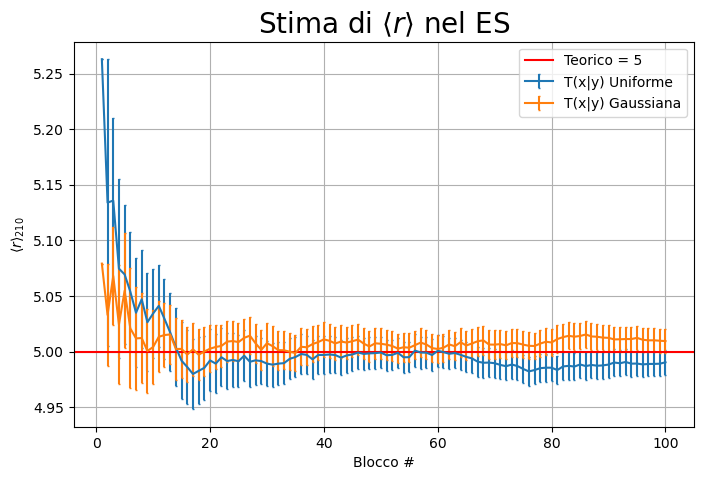

Valore medio finale di <r> nel ES con p. uniforme =  4.99034
Incertezza =  0.0110203

Valore medio finale di <r> nel ES con p. gaussiana =  5.00942
Incertezza =  0.0105568


In [5]:
# Excited state
plt.figure(figsize=(8,5))

block, r_es_unif, err_es_unif = np.loadtxt('OUTPUT/radius/es_unif/radius.dat', skiprows=1, usecols=(0,2,3), unpack=True)
block, r_es_gauss, err_es_gauss = np.loadtxt('OUTPUT/radius/es_gauss/radius.dat', skiprows=1, usecols=(0,2,3), unpack=True)

plt.errorbar(block, r_es_unif, yerr=err_es_unif, capsize=1, label='T(x|y) Uniforme')
plt.errorbar(block, r_es_gauss, yerr=err_es_gauss, capsize=1, label='T(x|y) Gaussiana')
plt.axhline(y=5, color='r', linestyle='-', label='Teorico = 5')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel(r'$\langle r \rangle_{210}$', fontsize=10)
plt.title(r'Stima di $\langle r \rangle$ nel ES', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

print('Valore medio finale di <r> nel ES con p. uniforme = ', r_es_unif[-1])
print('Incertezza = ', err_es_unif[-1])
print()
print('Valore medio finale di <r> nel ES con p. gaussiana = ', r_es_gauss[-1])
print('Incertezza = ', err_es_gauss[-1])

Dai grafici si osserva che, sia nel GS sia nel ES, i risultati ottenuti con probabilità di transizione $T(x|y)$ uniforme e gaussiana sono compatibili con i valori attesi di $\langle r \rangle$ entro l'incertezza statistica.

La differenza principale tra i due metodi di campionamento riguarda il modo in cui vengono proposte le mosse. Infatti con la probabilità uniforme i passi possibili hanno ampiezza massima fissata quindi l’esplorazione è più rapida, mentre con la probabilità gaussiana i passi piccoli sono molto più probabili e quelli grandi sono rari. In entrambi i casi è necessario quindi regolare opportunamente $L$, in modo da mantenere un tasso di accettazione simile. 

Nel GS in generale si può adottare un passo leggermente più grande rispetto al ES, poiché nel primo caso la densità di probabilità è sferica, monotona e concentrata attorno al nucleo, quindi più semplice da campionare con mosse ampie.